<a href="https://colab.research.google.com/github/RanaAyman/Speech_Emotion_Recognition/blob/main/Speech_Emotion_Recognition___Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Link of Dataset on Drive:**

https://drive.google.com/drive/folders/17yUblWe6cbYdWUGXZ6wqlhxU9aa_-ehj?usp=sharing

## 1. Download the Dataset and Understand the Format
a. We will use CREMA dataset that is available at the following link:
https://www.kaggle.com/dmitrybabko/speech-emotion-recognition-en

b. Write your own function that loads an audio and listen to each of the
classes you have and plot the waveform of the audio.

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Speech_Emotion_Recognition_Dataset/Crema.zip' 

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1031_DFA_DIS_XX.wav  
  inflating: Crema/1031_DFA_FEA_XX.wav  
  inflating: Crema/1031_DFA_HAP_XX.wav  
  inflating: Crema/1031_DFA_NEU_XX.wav  
  inflating: Crema/1031_DFA_SAD_XX.wav  
  inflating: Crema/1031_IEO_ANG_HI.wav  
  inflating: Crema/1031_IEO_ANG_LO.wav  
  inflating: Crema/1031_IEO_ANG_MD.wav  
  inflating: Crema/1031_IEO_DIS_HI.wav  
  inflating: Crema/1031_IEO_DIS_LO.wav  
  inflating: Crema/1031_IEO_DIS_MD.wav  
  inflating: Crema/1031_IEO_FEA_HI.wav  
  inflating: Crema/1031_IEO_FEA_LO.wav  
  inflating: Crema/1031_IEO_FEA_MD.wav  
  inflating: Crema/1031_IEO_HAP_HI.wav  
  inflating: Crema/1031_IEO_HAP_LO.wav  
  inflating: Crema/1031_IEO_HAP_MD.wav  
  inflating: Crema/1031_IEO_NEU_XX.wav  
  inflating: Crema/1031_IEO_SAD_HI.wav  
  inflating: Crema/1031_IEO_SAD_LO.wav  
  inflating: Crema/1031_IEO_SAD_MD.wav  
  inflating: Crema/1031_IOM_ANG_XX.wav  
  inflating: Crema/1031_IOM_DIS_XX.wav  
  infl

In [ ]:
import os
cremaFiles = os.listdir(path='/content/Crema')
cremaFiles.sort()
print(cremaFiles[0])
len(cremaFiles)

1001_DFA_ANG_XX.wav


7442

In [ ]:
import pandas as pd
filesEmotions = []
filesNames = []

for file in cremaFiles:
    filesNames.append(file)
    emotion = file.split('_')[2]
    filesEmotions.append(emotion)

emotionsDF = pd.DataFrame(filesEmotions, columns=['Emotion'])
filesNamesDF = pd.DataFrame(filesNames, columns=['File Name'])
CremaDF = pd.concat([emotionsDF, filesNamesDF], axis=1)
CremaDF.head()

,Emotion,File Name
0,ANG,1001_DFA_ANG_XX.wav
1,DIS,1001_DFA_DIS_XX.wav
2,FEA,1001_DFA_FEA_XX.wav
3,HAP,1001_DFA_HAP_XX.wav
4,NEU,1001_DFA_NEU_XX.wav


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


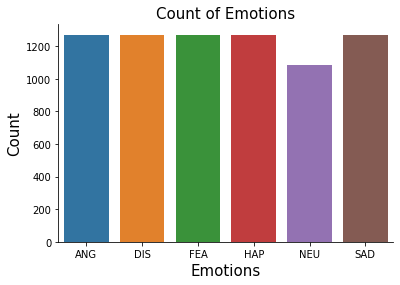

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Count of Emotions', size=15)
sns.countplot(CremaDF.Emotion)
plt.ylabel('Count', size=15)
plt.xlabel('Emotions', size=15)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
import librosa
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np

emotionLabel = {
    "SAD": "sad",
    "ANG": "angry",
    "DIS": "disgust",
    "FEA": "fear",
    "HAP": "happy",   
    "NEU": "neutral" 
}

def audioWaveform(data,sampling_rate,fileName):
    print("FileName: "+fileName)
    plt.title("Waveplot for audio with " + emotionLabel[fileName.split('_')[2]] + " emotion.", fontdict=dict(size=15))
    librosa.display.waveshow(data, sr=sampling_rate )
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.pause(0.02)
    plt.show


def melSpectogram(data,sampling_rate,fileName,plot=False):
    mel_signal = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
    spectrogram = np.abs(mel_signal)
    #In spectrogram most of the frequencies contribute very little to the overall amplitude of the sound.
    #A way to visualize loudness, which is not linear but logarithmic, is to convert our spectrograms 
    #from amplitude to decibels.
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    ##plotting
    if(plot):
      print("FileName: "+fileName)
      librosa.display.specshow(power_to_db, sr=sampling_rate, x_axis='time', y_axis='mel', cmap='viridis')
      plt.colorbar(label='dB')
      plt.title("MelSpectogram (dB) for audio with " + emotionLabel[fileName.split('_')[2]] + " emotion.", fontdict=dict(size=15))
      plt.xlabel('Time', fontdict=dict(size=15))
      plt.ylabel('Frequency', fontdict=dict(size=15))
      plt.show()
    return power_to_db

def playAudio(data,sampling_rate,fileName):
    print("Listen to audio with " + emotionLabel[fileName.split('_')[2]] + " emotion."+"\nFileName: "+fileName)
    display(ipd.Audio(data, rate=sampling_rate ))
 
def listenAndPlot(emotion):
    fileName = CremaDF[CremaDF["Emotion"] == emotion].iloc[0][1]
    data, sampling_rate  = librosa.load('/content/Crema/'+fileName)
    audioWaveform(data,sampling_rate,fileName)
    melSpectogram(data,sampling_rate,fileName,True)
    playAudio(data,sampling_rate,fileName)
    print("\n\n")

FileName: 1001_DFA_ANG_XX.wav


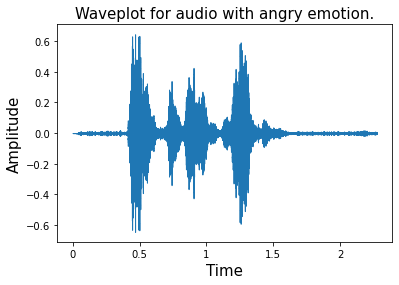

FileName: 1001_DFA_ANG_XX.wav


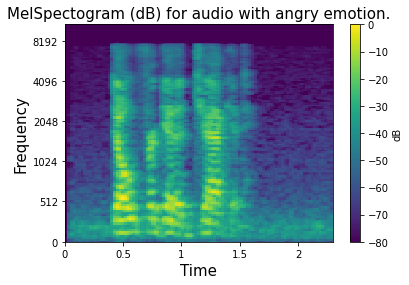

Listen to audio with angry emotion.
FileName: 1001_DFA_ANG_XX.wav





FileName: 1001_DFA_DIS_XX.wav


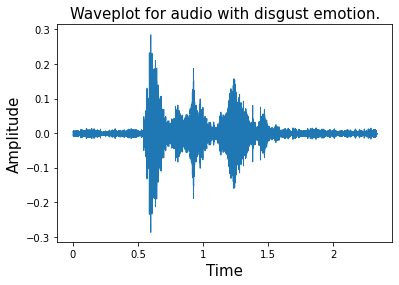

FileName: 1001_DFA_DIS_XX.wav


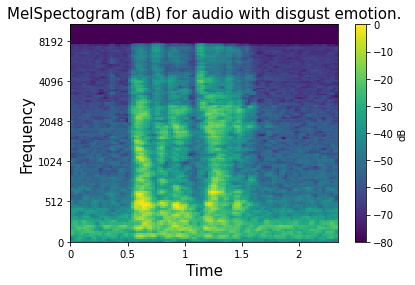

Listen to audio with disgust emotion.
FileName: 1001_DFA_DIS_XX.wav





FileName: 1001_DFA_FEA_XX.wav


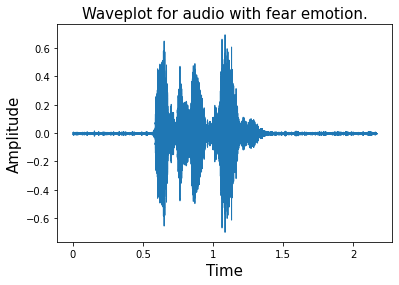

FileName: 1001_DFA_FEA_XX.wav


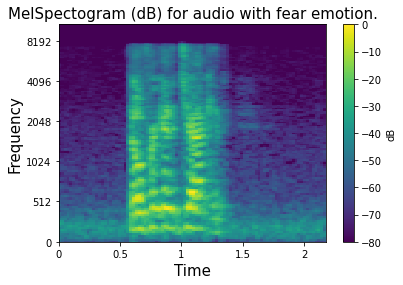

Listen to audio with fear emotion.
FileName: 1001_DFA_FEA_XX.wav





FileName: 1001_DFA_HAP_XX.wav


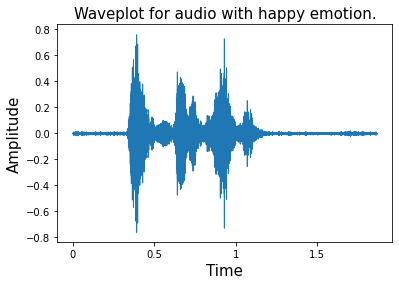

FileName: 1001_DFA_HAP_XX.wav


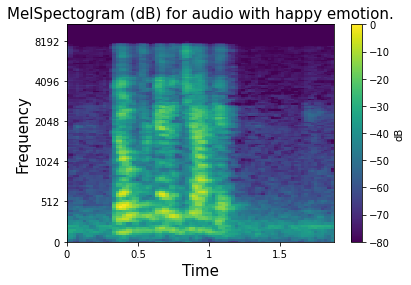

Listen to audio with happy emotion.
FileName: 1001_DFA_HAP_XX.wav





FileName: 1001_DFA_NEU_XX.wav


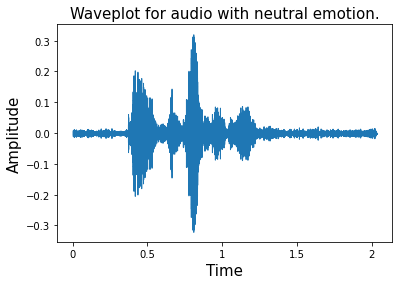

FileName: 1001_DFA_NEU_XX.wav


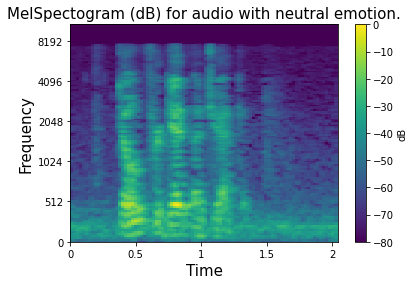

Listen to audio with neutral emotion.
FileName: 1001_DFA_NEU_XX.wav





FileName: 1001_DFA_SAD_XX.wav


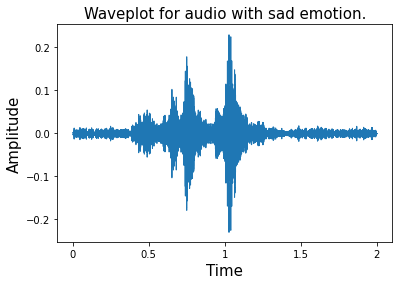

FileName: 1001_DFA_SAD_XX.wav


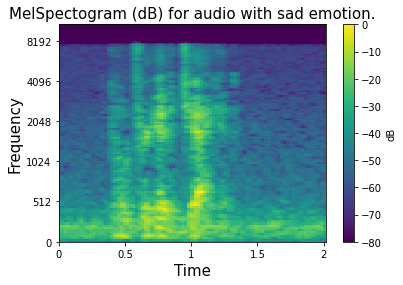

Listen to audio with sad emotion.
FileName: 1001_DFA_SAD_XX.wav


In [ ]:
for emotion in CremaDF["Emotion"].unique():
    listenAndPlot(emotion)

##2. Create the Feature Space
We will create two feature spaces from the audio.


1.   You can work on time domain, or you can work in frequency domain.
There are multiple of features that can help improving the model:


*   Zero crossing rate: The rate of sign-changes of the signal during the duration of a particular frame.
*   Energy: The sum of squares of the signal values, normalized by the respective frame length.


2.   Convert the audio waveform to mel spectrogram and use this as the
feature space.

In [ ]:
import librosa

In [ ]:
def zeroCrossingRate(data,sampling_rate,fileName,plot=False):
    zcr = librosa.feature.zero_crossing_rate(data)[0]
    ##plotting
    if(plot):
      print("FileName: "+fileName)
      frames = range(len(zcr))
      t = librosa.frames_to_time(frames)
      plt.title("Zero Crossing Rate Feature Space.", fontdict=dict(size=15))
      plt.xlabel('Time', fontdict=dict(size=15))
      plt.plot(t, zcr, color="b")
      plt.ylim(0, 1)
      plt.show()
    return zcr

In [ ]:
import numpy as np

def energy(data,sampling_rate,fileName,plot=False):
    frame_length=2048
    hop_length=512
    
    data, sampling_rate  = librosa.load('/content/Crema/'+fileName)  

    energy = np.array([
    sum(abs(data[i:i+frame_length]**2))
    for i in range(0, len(data), hop_length)])/frame_length
    ##plotting
    if(plot):
      print("FileName: "+fileName)
      frames = range(len(energy))
      t = librosa.frames_to_time(frames)
      plt.title("Energy Feature Space.", fontdict=dict(size=15))
      plt.xlabel('Time', fontdict=dict(size=15))
      plt.plot(t, energy, color="r")
      plt.show()
    return energy

In [ ]:
# Already Implemented Above ...
#def melSpectogram(data,sampling_rate,fileName,plot=False):

FileName: 1013_ITH_ANG_XX.wav


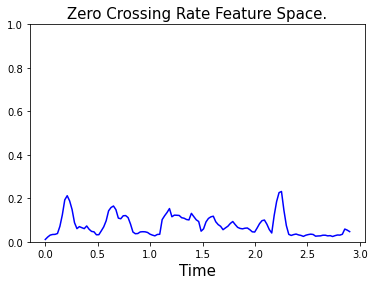

FileName: 1013_ITH_ANG_XX.wav


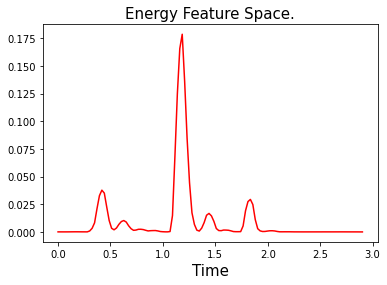

FileName: 1013_ITH_ANG_XX.wav


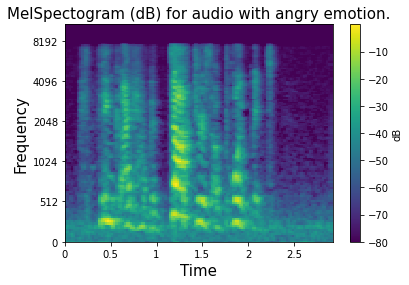

In [ ]:
data, sampling_rate  = librosa.load('/content/Crema/1013_ITH_ANG_XX.wav')
zrc = zeroCrossingRate(data,sampling_rate,"1013_ITH_ANG_XX.wav",True)
energy(data,sampling_rate,"1013_ITH_ANG_XX.wav",True)
msgram=melSpectogram(data, sampling_rate,"1013_ITH_ANG_XX.wav",True)
# print(data)
# waveform, sample_rate = torchaudio.load('/content/Crema/1013_ITH_ANG_XX.wav')
# print(waveform.numpy())

In [ ]:
import numpy

durations = [ librosa.get_duration(filename='/content/Crema/'+p) for p in cremaFiles ]

stats = {
    'mean': numpy.mean(durations),
    'max': numpy.max(durations),
    'min': numpy.min(durations),
}

print(stats)

{'mean': 2.5428836670249932, 'max': 5.005, 'min': 1.2679375}


In [ ]:
SAMPLE_RATE = 22050
NUM_SAMPLES = 22050*5  # 5 seconds
def preprocessSignal(signal,NUM_SAMPLES = 22050*5):
      if signal.shape[0] > NUM_SAMPLES:
          signal = signal[:NUM_SAMPLES]
      elif signal.shape[0] < NUM_SAMPLES:  
          num_missing_samples = NUM_SAMPLES - signal.shape[0]
          last_dim_padding = (0, num_missing_samples)
          signal = librosa.util.fix_length(signal, size=NUM_SAMPLES)
      return signal    

##3. Building the Model
a. Split the data into 70% training and validation and
30% testing.

b. Use 5% of the training and validation data for
validation.

c. CNN Model:

Build a CNN architecture of your own, a simple
example is shown in the figure. For the time domain
or frequency domain feature space, the feature space will be 1 dimensional, therefore in the architecture we will be using 1D
convolutions. While in melspectogram feature space, the audio is
represented as an image, therefore we will be using 2D convolutions.
N.B. Do not use the built-in models, but you can implement them from
scratch.

In [ ]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, y_train_val, y_test =  train_test_split(filesNames, filesEmotions, test_size = 0.3,stratify=filesEmotions,shuffle=True)
x_train, x_val, y_train, y_val =  train_test_split(x_train_val, y_train_val, test_size = 0.05,stratify=y_train_val,shuffle=True)
len(x_train), len(y_train),len(x_val),len(y_val), len(x_test), len(y_test)

(4948, 4948, 261, 261, 2233, 2233)

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

In [ ]:
from tqdm import tqdm
SAMPLE_RATE = 22050
NUM_SAMPLES = 22050*5  # 5 seconds

def dataLoader(x,y):
    emotion=[]
    zeroCrossing=[]
    for file in tqdm(x):
      signal, sampling_rate  = librosa.load('/content/Crema/'+file)  
      emotion.append(file.split('_')[2])
      #signal padding or cutting
      if signal.shape[0] > NUM_SAMPLES:
          signal = signal[:NUM_SAMPLES]
      elif signal.shape[0] < NUM_SAMPLES:  
          num_missing_samples = NUM_SAMPLES - signal.shape[0]
          last_dim_padding = (0, num_missing_samples)
          signal = librosa.util.fix_length(signal, size=NUM_SAMPLES)
      zeroCrossing.append(zeroCrossingRate(signal,sampling_rate,file))
    return zeroCrossing,emotion

In [ ]:
x_train_z,y_train_z = dataLoader(x_train,y_train)
x_test_z,y_test_z = dataLoader(x_test,y_test)
x_val_z,y_val_z = dataLoader(x_val,y_val)

x_train_z = np.array(x_train_z)
y_train_z = np.array(y_train_z)

x_test_z = np.array(x_test_z)
y_test_z = np.array(y_test_z)

x_val_z = np.array(x_val_z)
y_val_z = np.array(y_val_z)
x_train_z.shape, y_train_z.shape, x_test_z.shape, y_test_z.shape, x_val_z.shape, y_val_z.shape

100%|██████████| 261/261 [00:20<00:00, 12.66it/s]


((4948, 216), (4948,), (2233, 216), (2233,), (261, 216), (261,))

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y_train_zz = encoder.fit_transform(np.array(y_train_z).reshape(-1,1)).toarray()
y_test_zz = encoder.fit_transform(np.array(y_test_z).reshape(-1,1)).toarray()
y_val_zz = encoder.fit_transform(np.array(y_val_z).reshape(-1,1)).toarray()
x_train_zz = x_train_z
x_test_zz = x_test_z
x_val_zz = x_val_z
x_train_zz.shape, y_train_zz.shape, x_test_zz.shape, y_test_zz.shape, x_val_zz.shape, y_val_zz.shape

((4948, 216), (4948, 6), (2233, 216), (2233, 6), (261, 216), (261, 6))

In [ ]:
# making our data compatible to model.
x_train_zzz = np.expand_dims(x_train_zz, axis=2)
x_test_zzz = np.expand_dims(x_test_zz, axis=2)
x_val_zzz = np.expand_dims(x_val_zz, axis=2)
x_train_zzz.shape, y_train_zz.shape, x_test_zzz.shape, y_test_zz.shape, x_val_zzz.shape, y_val_zz.shape

((4948, 216, 1), (4948, 6), (2233, 216, 1), (2233, 6), (261, 216, 1), (261, 6))

##1D Model | Trail 1 

In [ ]:
import keras
from keras.models import Model, Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense
import tensorflow as tf

model_1d_t1 = keras.Sequential();

#1st conv layer 
model_1d_t1.add(keras.layers.Conv1D(64, kernel_size=3, strides=2, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(keras.layers.Conv1D(64, kernel_size=2, strides=2, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(MaxPooling1D(pool_size=8, strides = 2, padding = 'same'))
model_1d_t1.add(keras.layers.BatchNormalization())

#2nd conv layer
model_1d_t1.add(keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model_1d_t1.add(keras.layers.BatchNormalization())

#3rd conv layer
model_1d_t1.add(keras.layers.Conv1D(256, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(keras.layers.Conv1D(256, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(keras.layers.Conv1D(256, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model_1d_t1.add(keras.layers.BatchNormalization())

#4th conv layer
model_1d_t1.add(keras.layers.Conv1D(512, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(keras.layers.Conv1D(512, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(keras.layers.Conv1D(512, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d_t1.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model_1d_t1.add(keras.layers.BatchNormalization())


#flatten and feeed
model_1d_t1.add(keras.layers.Flatten())
model_1d_t1.add(keras.layers.Dense(4096, activation='relu'))
model_1d_t1.add(keras.layers.Dense(4096, activation='relu'))
model_1d_t1.add(keras.layers.Dropout(0.25))

#output layer
model_1d_t1.add(Dense(units=6, activation='softmax'))

#compile model
model_1d_t1.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])



In [ ]:
model_1d_t1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 108, 64)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 54, 64)            8256      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 64)           0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 64)           256       
 ormalization)                                                   
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 27, 128)           4

In [ ]:
from keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history_1d_t1=model_1d_t1.fit(x_train_zzz, y_train_zz, batch_size=128, epochs=100, validation_data=(x_val_zzz, y_val_zz), callbacks=[rlrp])

Epoch 1/100
39/39 [==============================] - 23s 83ms/step - loss: 2.6167 - accuracy: 0.2411 - val_loss: 1.8461 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 2/100
39/39 [==============================] - 2s 59ms/step - loss: 1.6340 - accuracy: 0.3084 - val_loss: 1.8382 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 3/100
39/39 [==============================] - 3s 70ms/step - loss: 1.5928 - accuracy: 0.3359 - val_loss: 1.8649 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 4/100
39/39 [==============================] - 3s 68ms/step - loss: 1.5637 - accuracy: 0.3557 - val_loss: 1.8515 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 5/100
39/39 [==============================] - 3s 66ms/step - loss: 1.5550 - accuracy: 0.3610 - val_loss: 1.9532 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 6/100
39/39 [==============================] - 2s 63ms/step - loss: 1.5355 - accuracy: 0.3678 - val_loss: 2.0933 - val_accuracy: 0.1724 - lr: 0.0010
Epoch 7/100
39/39 [==============================] - 2s 58ms/step - l

In [ ]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

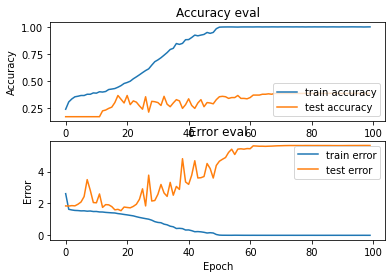

In [ ]:
plot_history(history_1d_t1)

In [ ]:
test_loss_1d_t1, test_acc_1d_t1 = model_1d_t1.evaluate(x_test_zzz, y_test_zz, verbose=2)
print('\nTest accuracy:', test_acc_1d_t1)

70/70 - 1s - loss: 6.0978 - accuracy: 0.3292 - 953ms/epoch - 14ms/step

Test accuracy: 0.3291535973548889


##1D Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 216, 256)          1536      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 108, 256)         0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 108, 256)          327936    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 54, 256)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 256)           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 54, 128)          

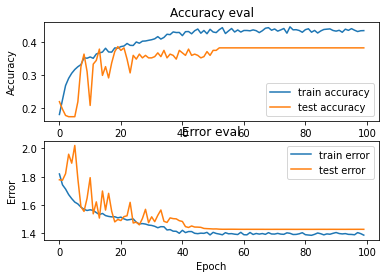

70/70 - 1s - loss: 1.4677 - accuracy: 0.4183 - 876ms/epoch - 13ms/step

Test accuracy: 0.41827139258384705


In [ ]:
import keras
from keras.models import Model, Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Dense
import tensorflow as tf

model_1d=Sequential()


#1st layer
model_1d.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train_zzz.shape[1], 1)))
model_1d.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

#2nd layer
model_1d.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model_1d.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_1d.add(Dropout(0.1))

#3rd layer
model_1d.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model_1d.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_1d.add(Dropout(0.1))

#4th layer
model_1d.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))

#5th layer
model_1d.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model_1d.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_1d.add(keras.layers.BatchNormalization())

#6th layer
model_1d.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))

#7th layer
model_1d.add(Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'))
model_1d.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model_1d.add(keras.layers.BatchNormalization())

model_1d.add(Flatten())
model_1d.add(Dense(units=32, activation='relu'))
model_1d.add(Dropout(0.3))

model_1d.add(Dense(units=6, activation='softmax'))
model_1d.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model_1d.summary()

from keras.callbacks import ReduceLROnPlateau
rlrp_1d = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history_1d=model_1d.fit(x_train_zzz, y_train_zz, batch_size=128, epochs=100, validation_data=(x_val_zzz, y_val_zz), callbacks=[rlrp_1d])

70/70 [==============================] - 1s 9ms/step - loss: 1.4677 - accuracy: 0.4183
Accuracy of our model on test data :  41.827139258384705 %


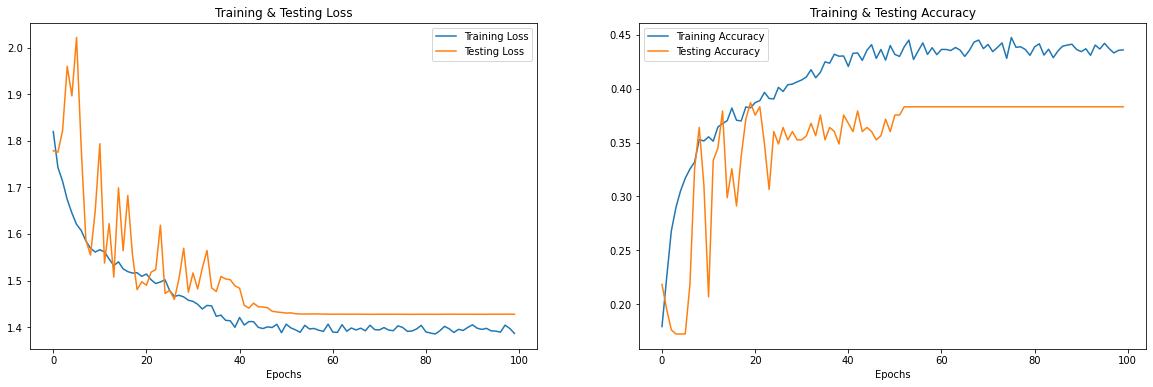

In [ ]:
print("Accuracy of our model on test data : " , model_1d.evaluate(x_test_zzz,y_test_zz)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc_1d = history_1d.history['accuracy']
train_loss_1d = history_1d.history['loss']
test_acc_1d = history_1d.history['val_accuracy']
test_loss_1d = history_1d.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_1d , label = 'Training Loss')
ax[0].plot(epochs , test_loss_1d , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_1d , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_1d , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

##2D Model

In [ ]:
from sklearn.model_selection import train_test_split
x_train_val_mel, x_test_mel, y_train_val_mel, y_test_mel =  train_test_split(filesNames, filesEmotions, test_size = 0.3,stratify=filesEmotions,shuffle=True)
x_train_mel, x_val_mel, y_train_mel, y_val_mel =  train_test_split(x_train_val_mel, y_train_val_mel, test_size = 0.05,stratify=y_train_val_mel,shuffle=True)
len(x_train_mel), len(y_train_mel),len(x_val_mel),len(y_val_mel), len(x_test_mel), len(y_test_mel)

(4948, 4948, 261, 261, 2233, 2233)

In [ ]:
x_train_mel = np.array(x_train_mel)
y_train_mel = np.array(y_train_mel)

x_test_mel = np.array(x_test_mel)
y_test_mel = np.array(y_test_mel)

x_val_mel = np.array(x_val_mel)
y_val_mel = np.array(y_val_mel)

In [ ]:
from tqdm import tqdm
SAMPLE_RATE = 22050
NUM_SAMPLES = 22050*5  # 5 seconds

def dataLoader(x,y):
    emotion=[]
    melSpecto=[]
    for file in tqdm(x):
      signal, sampling_rate  = librosa.load('/content/Crema/'+file)  
      emotion.append(file.split('_')[2])
      #signal padding or cutting
      if signal.shape[0] > NUM_SAMPLES:
          signal = signal[:NUM_SAMPLES]
      elif signal.shape[0] < NUM_SAMPLES:  
          num_missing_samples = NUM_SAMPLES - signal.shape[0]
          last_dim_padding = (0, num_missing_samples)
          signal = librosa.util.fix_length(signal, size=NUM_SAMPLES)
      melSpecto.append(melSpectogram(signal,sampling_rate,file))
    return melSpecto,emotion

In [ ]:
x_train_mels,y_train_mels = dataLoader(x_train_mel,y_train_mel)
x_test_mels,y_test_mels = dataLoader(x_test_mel,y_test_mel)
x_val_mels,y_val_mels = dataLoader(x_val_mel,y_val_mel)

x_train_mels = np.array(x_train_mels)
y_train_mels = np.array(y_train_mels)

x_test_mels = np.array(x_test_mels)
y_test_mels = np.array(y_test_mels)

x_val_mels = np.array(x_val_mels)
y_val_mels = np.array(y_val_mels)
x_train_mels.shape, y_train_mels.shape, x_test_mels.shape, y_test_mels.shape, x_val_mels.shape, y_val_mels.shape

100%|██████████| 261/261 [00:38<00:00,  6.78it/s]


((4948, 128, 216), (4948,), (2233, 128, 216), (2233,), (261, 128, 216), (261,))

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
y_train_melss= encoder.fit_transform(np.array(y_train_mels).reshape(-1,1)).toarray()
y_test_melss= encoder.fit_transform(np.array(y_test_mels).reshape(-1,1)).toarray()
y_val_melss = encoder.fit_transform(np.array(y_val_mels).reshape(-1,1)).toarray()
x_train_melss = x_train_mels
x_test_melss = x_test_mels
x_val_melss = x_val_mels
x_train_melss.shape, y_train_melss.shape, x_test_melss.shape, y_test_melss.shape, x_val_melss.shape, y_val_melss.shape

((4948, 128, 216),
 (4948, 6),
 (2233, 128, 216),
 (2233, 6),
 (261, 128, 216),
 (261, 6))

In [ ]:
# making our data compatible to model.
x_train_melsss = np.expand_dims(x_train_melss, axis=3)
x_test_melsss = np.expand_dims(x_test_melss, axis=3)
x_val_melsss = np.expand_dims(x_val_melss, axis=3)
x_train_melsss.shape, y_train_melss.shape, x_test_melsss.shape, y_test_melss.shape, x_val_melsss.shape, y_val_melss.shape

((4948, 128, 216, 1),
 (4948, 6),
 (2233, 128, 216, 1),
 (2233, 6),
 (261, 128, 216, 1),
 (261, 6))

##2D Model | Trail 1

In [ ]:
import cv2
import numpy as np
import os
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout
from keras import backend as K
import keras
from keras.models import Sequential, Model
from keras.models import load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from google.colab.patches import cv2_imshow
from keras.layers import Conv2D, Conv1D, MaxPooling2D, AveragePooling1D
import tensorflow as tf
from keras.layers import BatchNormalization

In [ ]:
model2D = Sequential()

model2D.add(Conv2D(8, (13, 13), input_shape=(x_train_melsss.shape[1], x_train_melsss.shape[2], 1)))
model2D.add(BatchNormalization(axis=-1))
model2D.add(Activation('relu'))


model2D.add(Conv2D(8, (13, 13)))
model2D.add(BatchNormalization(axis=-1))
model2D.add(Activation('relu'))
model2D.add(MaxPooling2D(pool_size=(2, 1)))


model2D.add(Conv2D(8, (3, 3)))
model2D.add(BatchNormalization(axis=-1))
model2D.add(Activation('relu'))


model2D.add(Conv2D(8, (1, 1)))
model2D.add(BatchNormalization(axis=-1))
model2D.add(Activation('relu'))
model2D.add(MaxPooling2D(pool_size=(2, 1)))


model2D.add(Flatten())
model2D.add(Dense(64))
model2D.add(BatchNormalization())
model2D.add(Activation('relu'))
model2D.add(Dropout(0.2))
model2D.add(Dense(6, activation = 'softmax'))


model2D.compile(
    optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy'],
)

model2D.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 116, 204, 8)       1360      
                                                                 
 batch_normalization_6 (Batc  (None, 116, 204, 8)      32        
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 116, 204, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 104, 192, 8)       10824     
                                                                 
 batch_normalization_7 (Batc  (None, 104, 192, 8)      32        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 104, 192, 8)      

In [ ]:
history2D=model2D.fit(
    x_train_melsss,
    y_train_melss,
    batch_size=64,
    epochs=50,
    validation_data = (x_val_melsss, y_val_melss))

Epoch 1/50
78/78 [==============================] - 15s 125ms/step - loss: 1.6440 - accuracy: 0.3577 - val_loss: 9.9788 - val_accuracy: 0.1992
Epoch 2/50
78/78 [==============================] - 8s 102ms/step - loss: 1.3447 - accuracy: 0.4735 - val_loss: 2.2826 - val_accuracy: 0.2912
Epoch 3/50
78/78 [==============================] - 8s 102ms/step - loss: 1.1717 - accuracy: 0.5530 - val_loss: 3.3387 - val_accuracy: 0.2146
Epoch 4/50
78/78 [==============================] - 8s 102ms/step - loss: 0.9728 - accuracy: 0.6593 - val_loss: 1.9525 - val_accuracy: 0.2452
Epoch 5/50
78/78 [==============================] - 8s 104ms/step - loss: 0.7898 - accuracy: 0.7423 - val_loss: 1.7355 - val_accuracy: 0.3755
Epoch 6/50
78/78 [==============================] - 8s 104ms/step - loss: 0.6147 - accuracy: 0.8452 - val_loss: 1.5580 - val_accuracy: 0.4368
Epoch 7/50
78/78 [==============================] - 8s 102ms/step - loss: 0.4812 - accuracy: 0.9066 - val_loss: 1.6811 - val_accuracy: 0.3793
Epoch

70/70 [==============================] - 2s 22ms/step - loss: 2.8243 - accuracy: 0.3099
Accuracy of our model on test data :  30.98970055580139 %


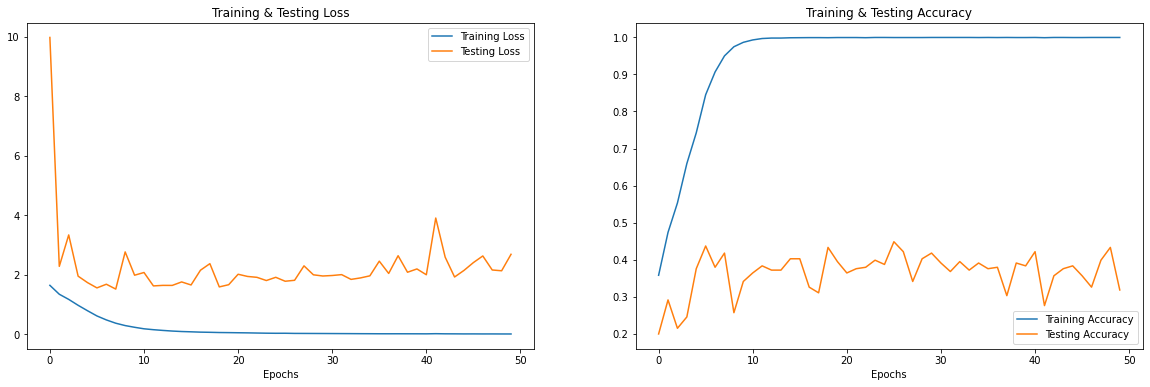

In [ ]:
print("Accuracy of our model on test data : " , model2D.evaluate(x_test_melsss,y_test_melss)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc_2d = history2D.history['accuracy']
train_loss_2d = history2D.history['loss']
test_acc_2d = history2D.history['val_accuracy']
test_loss_2d = history2D.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_2d , label = 'Training Loss')
ax[0].plot(epochs , test_loss_2d , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_2d , label = 'Training Accuracy')
ax[1].plot(epochs ,test_acc_2d , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

##2D Model | Continue

In [ ]:
model_2_2d = keras.Sequential()

# 1st conv layer
model_2_2d.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(x_train_melsss.shape[1],x_train_melsss.shape[2],1)))
model_2_2d.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_2_2d.add(keras.layers.BatchNormalization())

# 2nd conv layer
model_2_2d.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model_2_2d.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model_2_2d.add(keras.layers.BatchNormalization())

# 3rd conv layer
model_2_2d.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model_2_2d.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
model_2_2d.add(keras.layers.BatchNormalization())

# flatten output and feed it into dense layer
model_2_2d.add(keras.layers.Flatten())
model_2_2d.add(keras.layers.Dense(64, activation='relu'))
model_2_2d.add(keras.layers.Dropout(0.3))

# output layer
model_2_2d.add(keras.layers.Dense(6, activation='softmax'))

In [ ]:
# model_2_2d = keras.Sequential()

# # 1st conv layer
# model_2_2d.add(keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(x_train_melsss.shape[1],x_train_melsss.shape[2],1)))
# model_2_2d.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
# model_2_2d.add(keras.layers.Dropout(0.2))

# # 2nd conv layer
# model_2_2d.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
# model_2_2d.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model_2_2d.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

# # 3rd conv layer
# model_2_2d.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
# model_2_2d.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
# model_2_2d.add(keras.layers.BatchNormalization())

# # flatten output and feed it into dense layer
# model_2_2d.add(keras.layers.Flatten())
# model_2_2d.add(keras.layers.Dense(64, activation='relu'))
# model_2_2d.add(keras.layers.Dropout(0.3))

# # output layer
# model_2_2d.add(keras.layers.Dense(6, activation='softmax'))

In [ ]:
model_2_2d.compile(
    optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=['accuracy'],
)
model_2_2d.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 214, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 107, 32)      0         
 2D)                                                             
                                                                 
 batch_normalization_15 (Bat  (None, 63, 107, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 105, 32)       9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 53, 32)       0         
 2D)                                                             
                                                      

In [ ]:
history_2_2d=model_2_2d.fit(
    x_train_melsss,
    y_train_melss,
    batch_size=64,
    epochs=50,
    validation_data = (x_val_melsss, y_val_melss))

Epoch 1/50
78/78 [==============================] - 7s 82ms/step - loss: 1.6638 - accuracy: 0.3321 - val_loss: 10.1756 - val_accuracy: 0.1686
Epoch 2/50
78/78 [==============================] - 6s 78ms/step - loss: 1.4560 - accuracy: 0.4097 - val_loss: 3.6540 - val_accuracy: 0.1992
Epoch 3/50
78/78 [==============================] - 6s 78ms/step - loss: 1.3509 - accuracy: 0.4539 - val_loss: 1.9598 - val_accuracy: 0.3065
Epoch 4/50
78/78 [==============================] - 6s 78ms/step - loss: 1.2577 - accuracy: 0.4990 - val_loss: 1.8666 - val_accuracy: 0.3487
Epoch 5/50
78/78 [==============================] - 6s 78ms/step - loss: 1.1696 - accuracy: 0.5418 - val_loss: 1.4924 - val_accuracy: 0.3678
Epoch 6/50
78/78 [==============================] - 6s 78ms/step - loss: 1.0998 - accuracy: 0.5774 - val_loss: 1.3156 - val_accuracy: 0.4636
Epoch 7/50
78/78 [==============================] - 6s 78ms/step - loss: 1.0066 - accuracy: 0.6255 - val_loss: 1.3446 - val_accuracy: 0.4483
Epoch 8/50
7

70/70 [==============================] - 5s 69ms/step - loss: 2.0542 - accuracy: 0.4505
Accuracy of our model on test data :  45.05150020122528 %


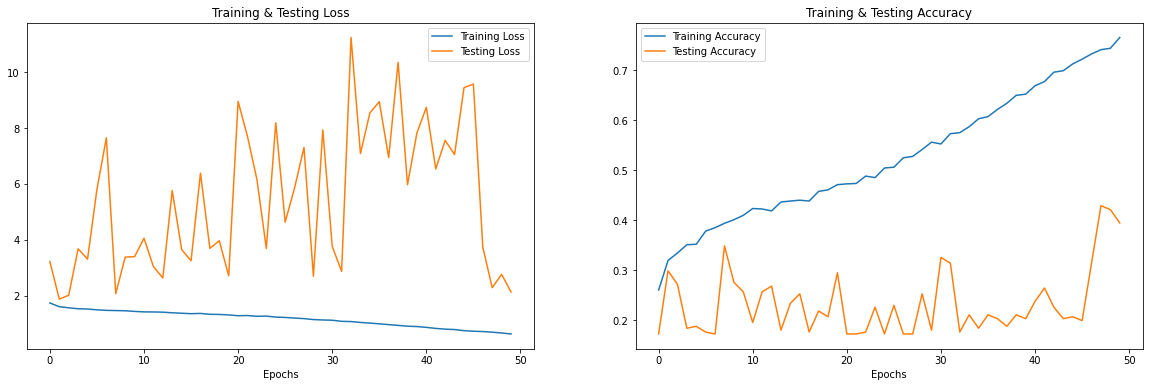

In [ ]:
print("Accuracy of our model on test data : " , model_2_2d.evaluate(x_test_melsss,y_test_melss)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc_2_2d = history_2_2d.history['accuracy']
train_loss_2_2d = history_2_2d.history['loss']
test_acc_2_2d = history_2_2d.history['val_accuracy']
test_loss_2_2d = history_2_2d.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_2_2d , label = 'Training Loss')
ax[0].plot(epochs , test_loss_2_2d , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_2_2d , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_2_2d , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

##4. Big Picture
Compare between the performance of the learned models (Different features,
different learning models) by realizing the following.

a. Compute the accuracy and F-Score for each model.

b. Plot the confusion matrices and find the most confusing classes.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pred_test_zeroCross= model_1d.predict(x_test_zzz)
y_pred_zeroCross = encoder.inverse_transform(pred_test_zeroCross)

y_test_zeroCross = encoder.inverse_transform(y_test_zz)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred_zeroCross.flatten()
df['Actual Labels'] = y_test_zeroCross.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,ANG,ANG
1,DIS,DIS
2,FEA,DIS
3,DIS,NEU
4,NEU,ANG
5,NEU,SAD
6,SAD,SAD
7,FEA,DIS
8,ANG,ANG
9,SAD,SAD


In [ ]:
print(classification_report(y_test_zeroCross, y_pred_zeroCross))

              precision    recall  f1-score   support

         ANG       0.56      0.62      0.58       381
         DIS       0.40      0.32      0.36       381
         FEA       0.35      0.15      0.21       382
         HAP       0.37      0.39      0.38       382
         NEU       0.39      0.43      0.40       326
         SAD       0.40      0.61      0.48       381

    accuracy                           0.42      2233
   macro avg       0.41      0.42      0.40      2233
weighted avg       0.41      0.42      0.40      2233



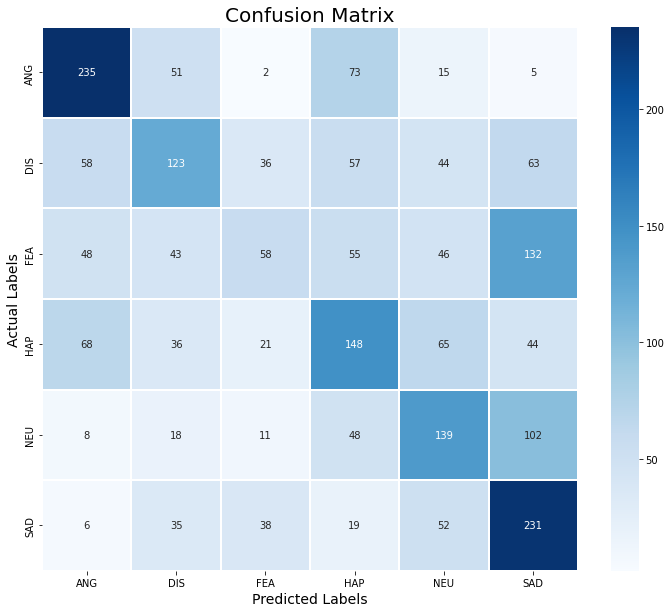

In [ ]:
confusionMatrix = confusion_matrix(y_test_zeroCross, y_pred_zeroCross)
plt.figure(figsize = (12, 10))
confusionMatrix = pd.DataFrame(confusionMatrix , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(confusionMatrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

-----------------------------------------------------------------------------------------------

In [ ]:
pred_test_specto = model_2_2d.predict(x_test_melsss)
y_pred_specto = encoder.inverse_transform(pred_test_specto)

y_test_specto = encoder.inverse_transform(y_test_melss)

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred_specto.flatten()
df['Actual Labels'] = y_test_specto.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,FEA,FEA
1,ANG,ANG
2,FEA,ANG
3,ANG,ANG
4,FEA,SAD
5,NEU,NEU
6,DIS,DIS
7,NEU,DIS
8,FEA,FEA
9,FEA,FEA


In [ ]:
print(classification_report(y_test_specto, y_pred_specto))

              precision    recall  f1-score   support

         ANG       0.64      0.70      0.67       382
         DIS       0.67      0.09      0.17       381
         FEA       0.33      0.68      0.44       382
         HAP       0.60      0.26      0.36       381
         NEU       0.44      0.68      0.54       326
         SAD       0.51      0.40      0.45       381

    accuracy                           0.46      2233
   macro avg       0.53      0.47      0.44      2233
weighted avg       0.53      0.46      0.43      2233



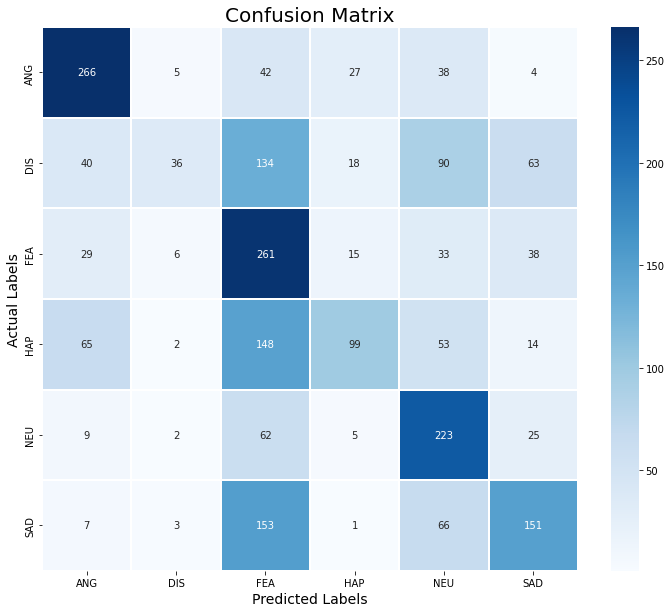

In [ ]:
confusionMatrix = confusion_matrix(y_test_specto, y_pred_specto)
plt.figure(figsize = (12, 10))
confusionMatrix = pd.DataFrame(confusionMatrix , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(confusionMatrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()